In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('martsales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
count=df.isnull().sum()
count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

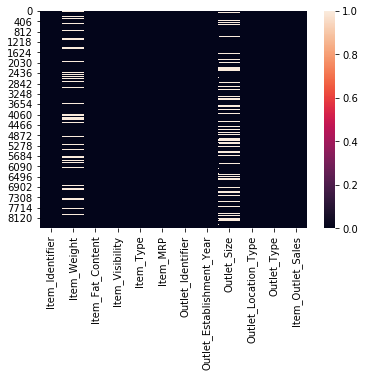

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
newcol=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        newcol.append(x)

In [11]:
newcol

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
for y in newcol:
    print(y)
    print(df[y].value_counts())
    print('\n')

Item_Identifier
FDW13    10
FDG33    10
NCB18     9
FDG09     9
NCF42     9
         ..
FDC23     1
FDQ60     1
FDO33     1
FDT35     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    55

In [13]:
df['Item_Weight'].mean()

12.857645184136183

In [14]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [15]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [16]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [17]:
df['Outlet_Size'].isnull().sum()

0

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df['Item_Visibility'].mean()

0.06613202877895127

In [20]:
df['Item_Visibility'].replace(0,df['Item_Visibility'].mean(),inplace=True)

In [21]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df['new_itemidentifier']=df['Item_Identifier'].apply(lambda x:x[:2])
df['new_itemidentifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: new_itemidentifier, Length: 8523, dtype: object

In [24]:
df.loc[df['new_itemidentifier']=='NC','Item_Fat_Content']='nonedible'
df['Item_Fat_Content'].value_counts()

Low Fat      3918
Regular      3006
nonedible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
df['outyears']=2013 - df['Outlet_Establishment_Year']
df['outyears']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outyears, Length: 8523, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,nonedible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


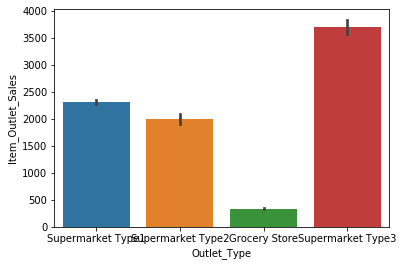

In [27]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
plt.show()

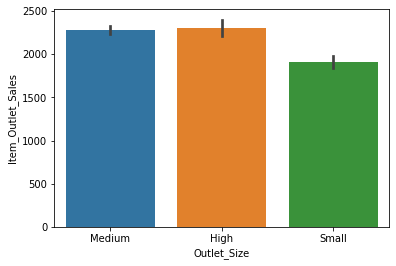

In [29]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)
plt.show()

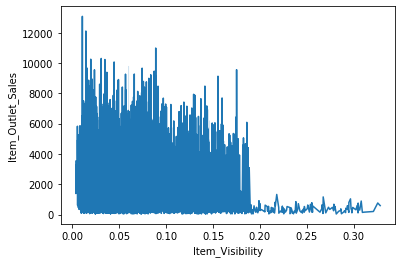

In [30]:
sns.lineplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
plt.show()

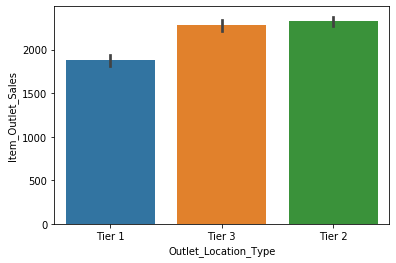

In [31]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)
plt.show()

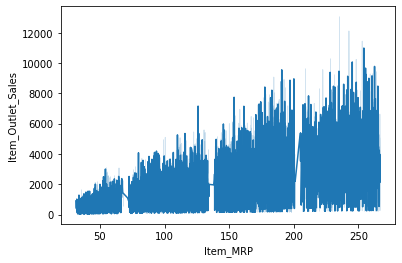

In [34]:
sns.lineplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
plt.show()

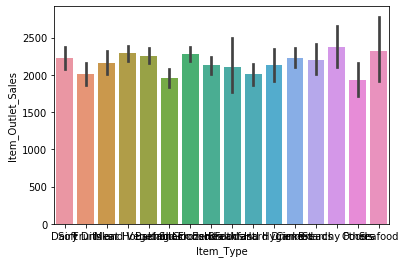

In [42]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
plt.show()

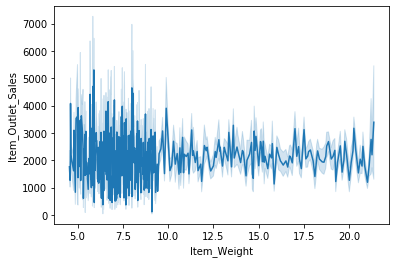

In [44]:
sns.lineplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()
column=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','new_itemidentifier']
for t in column:
    df[t]=le.fit_transform(df[t])


In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,14
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,4
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,14
3,FDX07,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800,1,15
4,NCD19,8.93,2,0.066132,9,53.8614,1,1987,0,2,1,994.7052,2,26


In [48]:
dff=df.drop(columns=['Item_Identifier','Outlet_Establishment_Year'])
dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
0,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380,1,14
1,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228,0,4
2,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700,1,14
3,19.200,1,0.066132,6,182.0950,0,1,2,0,732.3800,1,15
4,8.930,2,0.066132,9,53.8614,1,0,2,1,994.7052,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834,1,26
8519,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850,1,11
8520,10.600,2,0.035186,8,85.1224,6,2,1,1,1193.1136,2,9
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976,1,4


In [49]:
dco=dff.corr()
dco

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
Item_Weight,1.000000,0.034970,-0.017450,0.028015,0.024756,-0.007975,-0.007225,0.004088,-0.000566,0.011550,0.063232,0.008301
Item_Fat_Content,0.034970,1.000000,-0.040728,0.107364,0.008837,-0.009560,-0.003057,0.005291,-0.003964,0.000612,0.755331,0.002534
Item_Visibility,-0.017450,-0.040728,1.000000,-0.036000,-0.005259,-0.106377,0.072347,-0.027859,-0.179604,-0.134138,-0.046290,0.078355
Item_Type,0.028015,0.107364,-0.036000,1.000000,0.032651,0.001656,-0.001859,0.003084,0.003053,0.017048,0.007456,-0.004970
Item_MRP,0.024756,0.008837,-0.005259,0.032651,1.000000,0.003319,0.006059,0.000232,-0.001975,0.567574,0.032517,-0.005020
Outlet_Identifier,-0.007975,-0.009560,-0.106377,0.001656,0.003319,1.000000,0.504603,-0.716176,0.099873,0.162325,-0.009730,-0.079035
Outlet_Size,-0.007225,-0.003057,0.072347,-0.001859,0.006059,0.504603,1.000000,-0.614311,-0.201483,-0.086182,-0.000624,-0.193389
Outlet_Location_Type,0.004088,0.005291,-0.027859,0.003084,0.000232,-0.716176,-0.614311,1.000000,0.467219,0.089367,0.007661,0.089216
Outlet_Type,-0.000566,-0.003964,-0.179604,0.003053,-0.001975,0.099873,-0.201483,0.467219,1.000000,0.401522,0.001136,0.122304
Item_Outlet_Sales,0.011550,0.000612,-0.134138,0.017048,0.567574,0.162325,-0.086182,0.089367,0.401522,1.000000,0.011236,0.049135


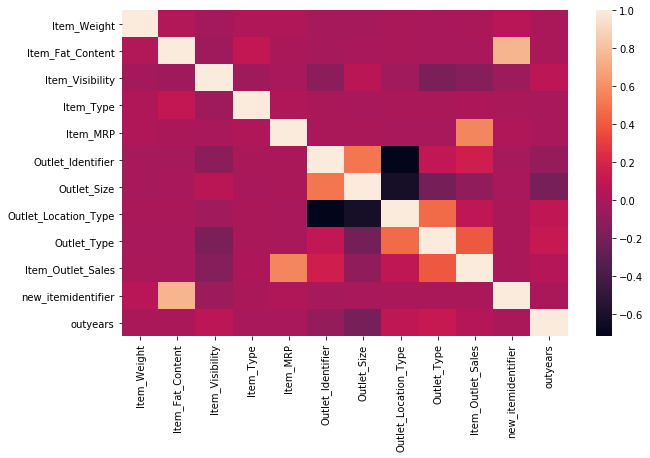

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(dco)

In [51]:
from scipy.stats import zscore

In [52]:
z_score=abs(zscore(dff))
print(dff.shape)
dffinal=dff.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(8523, 12)
(8334, 12)


In [53]:
dffinal.skew()

Item_Weight             0.089363
Item_Fat_Content        0.492679
Item_Visibility         0.864331
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Identifier      -0.065455
Outlet_Size            -0.087810
Outlet_Location_Type   -0.202747
Outlet_Type             0.957677
Item_Outlet_Sales       0.877845
new_itemidentifier      0.111713
outyears                0.423858
dtype: float64

In [54]:
dfp=pd.DataFrame(dffinal)
dfp

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
0,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380,1,14
1,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228,0,4
2,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700,1,14
3,19.200,1,0.066132,6,182.0950,0,1,2,0,732.3800,1,15
4,8.930,2,0.066132,9,53.8614,1,0,2,1,994.7052,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834,1,26
8519,8.380,1,0.046982,0,108.1570,7,1,1,1,549.2850,1,11
8520,10.600,2,0.035186,8,85.1224,6,2,1,1,1193.1136,2,9
8521,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976,1,4


In [55]:
for colu in dfp.columns:
    if dfp.skew().loc[colu]>0.55:
        dfp[colu]=np.log1p(dfp[colu])

In [56]:
dfp.skew()

Item_Weight             0.089363
Item_Fat_Content        0.492679
Item_Visibility         0.782318
Item_Type               0.098136
Item_MRP                0.138877
Outlet_Identifier      -0.065455
Outlet_Size            -0.087810
Outlet_Location_Type   -0.202747
Outlet_Type            -0.238219
Item_Outlet_Sales      -0.937152
new_itemidentifier      0.111713
outyears                0.423858
dtype: float64

In [57]:
dfp

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_itemidentifier,outyears
0,9.300,0,0.015920,4,249.8092,9,1,0,0.693147,8.225808,1,14
1,5.920,1,0.019095,14,48.2692,3,1,2,1.098612,6.096776,0,4
2,17.500,0,0.016621,10,141.6180,9,1,0,0.693147,7.648868,1,14
3,19.200,1,0.064037,6,182.0950,0,1,2,0.000000,6.597664,1,15
4,8.930,2,0.064037,9,53.8614,1,0,2,0.693147,6.903451,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.055230,13,214.5218,1,0,2,0.693147,7.929984,1,26
8519,8.380,1,0.045912,0,108.1570,7,1,1,0.693147,6.310436,1,11
8520,10.600,2,0.034581,8,85.1224,6,2,1,0.693147,7.085159,2,9
8521,7.210,1,0.135597,13,103.1332,3,1,2,1.098612,7.521100,1,4


In [58]:
x=dfp.drop(columns=['Item_Outlet_Sales'])
y=dfp['Item_Outlet_Sales']

In [59]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_itemidentifier,outyears
0,9.300,0,0.015920,4,249.8092,9,1,0,0.693147,1,14
1,5.920,1,0.019095,14,48.2692,3,1,2,1.098612,0,4
2,17.500,0,0.016621,10,141.6180,9,1,0,0.693147,1,14
3,19.200,1,0.064037,6,182.0950,0,1,2,0.000000,1,15
4,8.930,2,0.064037,9,53.8614,1,0,2,0.693147,2,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.055230,13,214.5218,1,0,2,0.693147,1,26
8519,8.380,1,0.045912,0,108.1570,7,1,1,0.693147,1,11
8520,10.600,2,0.034581,8,85.1224,6,2,1,0.693147,2,9
8521,7.210,1,0.135597,13,103.1332,3,1,2,1.098612,1,4


In [60]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8334, dtype: float64

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale=StandardScaler()

In [63]:
x=scale.fit_transform(x)

In [64]:
x

array([[-0.83694643, -0.96330186, -1.20190359, ..., -0.10239749,
        -0.18236893, -0.12018055],
       [-1.63171704,  0.35473421, -1.12412265, ...,  1.0482334 ,
        -2.09174414, -1.32241885],
       [ 1.09119527, -0.96330186, -1.18472305, ..., -0.10239749,
        -0.18236893, -0.12018055],
       ...,
       [-0.53126543,  1.67277028, -0.74471305, ..., -0.10239749,
         1.72700628, -0.7212997 ],
       [-1.32838743,  0.35473421,  1.73009262, ...,  1.0482334 ,
        -0.18236893, -1.32241885],
       [ 0.45631935, -0.96330186, -0.51640495, ..., -0.10239749,
        -2.09174414,  0.12026711]])

In [65]:
xd=pd.DataFrame(x)
xd

,0,1,2,3,4,5,6,7,8,9,10
0,-0.836946,-0.963302,-1.201904,-0.766911,1.772268,1.495703,-0.278609,-1.370589,-0.102397,-0.182369,-0.120181
1,-1.631717,0.354734,-1.124123,1.609882,-1.482824,-0.615550,-0.278609,1.099138,1.048233,-2.091744,-1.322419
2,1.091195,-0.963302,-1.184723,0.659165,0.024861,1.495703,-0.278609,-1.370589,-0.102397,-0.182369,-0.120181
3,1.490932,0.354734,-0.023071,-0.291552,0.678609,-1.671176,-0.278609,1.099138,-2.069414,-0.182369,0.000043
4,-0.923948,1.672770,-0.023071,0.421486,-1.392504,-1.319301,-1.940688,1.099138,-0.102397,1.727006,1.322505
...,...,...,...,...,...,...,...,...,...,...,...
8329,-1.409510,-0.963302,-0.238845,1.372203,1.202337,-1.319301,-1.940688,1.099138,-0.102397,-0.182369,1.322505
8330,-1.053275,0.354734,-0.467119,-1.717627,-0.515570,0.791952,-0.278609,-0.135725,-0.102397,-0.182369,-0.480852
8331,-0.531265,1.672770,-0.744713,0.183806,-0.887604,0.440077,1.383470,-0.135725,-0.102397,1.727006,-0.721300
8332,-1.328387,0.354734,1.730093,1.372203,-0.596710,-0.615550,-0.278609,1.099138,1.048233,-0.182369,-1.322419


In [66]:
xd.skew()

0     0.089363
1     0.492679
2     0.782318
3     0.098136
4     0.138877
5    -0.065455
6    -0.087810
7    -0.202747
8    -0.238219
9     0.111713
10    0.423858
dtype: float64

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=42)

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
def maxr2_score(regr,xd,y):
    max_r_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=r_state)
        regr.fit(xtrain,ytrain)
        ypred=regr.predict(xtest)
        r2_scr=r2_score(ytest,ypred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score= r2_scr
            finalrstate=r_state
    print('max r2 score corresponding to',finalrstate,'is',max_r_score)
    return finalrstate

In [69]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,xd,y)

r2 score corresponding to  42 is 0.6139261330331274
r2 score corresponding to  43 is 0.6129798086865379
r2 score corresponding to  44 is 0.6116907420679902
r2 score corresponding to  45 is 0.6238659443115132
r2 score corresponding to  46 is 0.6480022344790471
r2 score corresponding to  47 is 0.6400483946959337
r2 score corresponding to  48 is 0.618826477151063
r2 score corresponding to  49 is 0.6310518962102025
r2 score corresponding to  50 is 0.606764562581944
r2 score corresponding to  51 is 0.6067797442240395
r2 score corresponding to  52 is 0.6365467881130633
r2 score corresponding to  53 is 0.6074595803955727
r2 score corresponding to  54 is 0.6290969944482874
r2 score corresponding to  55 is 0.6429910945808212
r2 score corresponding to  56 is 0.6252590871857848
r2 score corresponding to  57 is 0.645731727301552
r2 score corresponding to  58 is 0.6399265366511935
r2 score corresponding to  59 is 0.6408816784693498
r2 score corresponding to  60 is 0.6368492727532011
r2 score corres

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(xd,y)
gknr.best_params_

{'n_neighbors': 26}

In [71]:
knr=KNeighborsRegressor(n_neighbors=26)
r_state=maxr2_score(knr,xd,y)

r2 score corresponding to  42 is 0.660382636636365
r2 score corresponding to  43 is 0.6687939369395266
r2 score corresponding to  44 is 0.6705332573253878
r2 score corresponding to  45 is 0.6776072517779316
r2 score corresponding to  46 is 0.6880328427921125
r2 score corresponding to  47 is 0.7003720039274763
r2 score corresponding to  48 is 0.663890602028668
r2 score corresponding to  49 is 0.6821132105250369
r2 score corresponding to  50 is 0.6653291116307296
r2 score corresponding to  51 is 0.6777151953627505
r2 score corresponding to  52 is 0.6709879803015435
r2 score corresponding to  53 is 0.6658872914952367
r2 score corresponding to  54 is 0.6812136908897851
r2 score corresponding to  55 is 0.6879736448911661
r2 score corresponding to  56 is 0.6876061945871753
r2 score corresponding to  57 is 0.6884916184133074
r2 score corresponding to  58 is 0.6831151486023952
r2 score corresponding to  59 is 0.6911957335610626
r2 score corresponding to  60 is 0.6886727023736793
r2 score corre

In [72]:
from sklearn.model_selection import cross_val_score
print('mean r2 score for LR',cross_val_score(lreg,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for LR is',cross_val_score(lreg,xd,y,cv=10,scoring='r2').std())

mean r2 score for LR 0.6244068938209253
Std dev. in r2 score for LR is 0.019868383339962867


In [73]:
print('mean r2 score for KNN',cross_val_score(knr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for KNR is',cross_val_score(knr,xd,y,cv=10,scoring='r2').std())

mean r2 score for KNN 0.6783485203027108
Std dev. in r2 score for KNR is 0.021548312524638267


In [74]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [75]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
list=[Lasso(),Ridge(),ElasticNet()]
for i in list:
    grid=GridSearchCV(estimator=i,param_grid=alphavalue)
    grid.fit(xd,y)
    print(grid.best_score_)
    print(grid.best_estimator_.alpha)
    print(grid.best_params_)
    print('\n')

0.6246543573620528
0.001
{'alpha': 0.001}


0.6246179909159423
1
{'alpha': 1}


0.6246363808637033
0.001
{'alpha': 0.001}




In [76]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,xd,y)


r2 score corresponding to  42 is 0.6140680513977157
r2 score corresponding to  43 is 0.6131095824637808
r2 score corresponding to  44 is 0.6120103724921209
r2 score corresponding to  45 is 0.6238755371907503
r2 score corresponding to  46 is 0.6480857157151498
r2 score corresponding to  47 is 0.6401180983995829
r2 score corresponding to  48 is 0.6187350918867272
r2 score corresponding to  49 is 0.6312094758410762
r2 score corresponding to  50 is 0.6067602158698158
r2 score corresponding to  51 is 0.6068564838824463
r2 score corresponding to  52 is 0.636571177145335
r2 score corresponding to  53 is 0.6075321844154786
r2 score corresponding to  54 is 0.6293070642150634
r2 score corresponding to  55 is 0.6429592427621371
r2 score corresponding to  56 is 0.6252081447656068
r2 score corresponding to  57 is 0.6455824724931982
r2 score corresponding to  58 is 0.6399890750609774
r2 score corresponding to  59 is 0.6408671601398795
r2 score corresponding to  60 is 0.6368920330738094
r2 score corr

In [77]:
print('mean r2 score for EN',cross_val_score(enr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for EN is',cross_val_score(enr,xd,y,cv=10,scoring='r2').std())

mean r2 score for EN 0.6244318946018658
Std dev. in r2 score for EN is 0.01982869661152921


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [79]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print('mean r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for GBR is',cross_val_score(gbr,xd,y,cv=10,scoring='r2').std())

mean r2 score for GBR is 0.7250822886623073
Std dev. in r2 score for GBR is 0.022171732081720665


In [80]:
from sklearn.svm import SVR

In [81]:

svr=SVR()
parameters={'kernel':['linear','poly','rbf'],'C':[1,10]}
clf=GridSearchCV(svr,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_


{'C': 1, 'kernel': 'rbf'}

In [82]:
svr=SVR(kernel='rbf',C=1)
print('mean r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(svr,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is 0.7107943282538021
Std dev. in r2 score for SVR is 0.022942934356221207


In [83]:
from sklearn.ensemble import RandomForestRegressor


In [84]:
rf=RandomForestRegressor()
parameters={'n_estimators':[10,500]}
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(xd,y)
clf.best_params_

{'n_estimators': 500}

In [85]:
rf=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rf,xd,y)

r2 score corresponding to  42 is 0.6827453617123783
r2 score corresponding to  43 is 0.6881620975771128
r2 score corresponding to  44 is 0.6881718339602283
r2 score corresponding to  45 is 0.7017813010109093
r2 score corresponding to  46 is 0.7104842936406903
r2 score corresponding to  47 is 0.7078400054807645
r2 score corresponding to  48 is 0.684176667128705
r2 score corresponding to  49 is 0.6952046321171921
r2 score corresponding to  50 is 0.6721673902843195
r2 score corresponding to  51 is 0.6861466606836157
r2 score corresponding to  52 is 0.6954204383669391
r2 score corresponding to  53 is 0.6882122631440292
r2 score corresponding to  54 is 0.7028581025437906
r2 score corresponding to  55 is 0.6989218540193307
r2 score corresponding to  56 is 0.7068580404820448
r2 score corresponding to  57 is 0.7177042277767423
r2 score corresponding to  58 is 0.6998141886433394
r2 score corresponding to  59 is 0.7099921647656777
r2 score corresponding to  60 is 0.7007908728217358
r2 score corr

In [86]:
rf=RandomForestRegressor(n_estimators=500)
print('mean r2 score for SVR is',cross_val_score(rf,xd,y,cv=10,scoring='r2').mean())
print('Std dev. in r2 score for SVR is',cross_val_score(rf,xd,y,cv=10,scoring='r2').std())

mean r2 score for SVR is 0.691642538283616
Std dev. in r2 score for SVR is 0.026855581501173526


In [87]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
r_state=maxr2_score(gbr,xd,y)


r2 score corresponding to  42 is 0.7141933474115019
r2 score corresponding to  43 is 0.7190902027778776
r2 score corresponding to  44 is 0.7202969786271989
r2 score corresponding to  45 is 0.7307342141102298
r2 score corresponding to  46 is 0.7412736285552886
r2 score corresponding to  47 is 0.744565598101103
r2 score corresponding to  48 is 0.7151263063087474
r2 score corresponding to  49 is 0.7326391250358488
r2 score corresponding to  50 is 0.7067404119650638
r2 score corresponding to  51 is 0.7148424456427039
r2 score corresponding to  52 is 0.7283143355200149
r2 score corresponding to  53 is 0.7171450462708595
r2 score corresponding to  54 is 0.7374344150190766
r2 score corresponding to  55 is 0.7322317327703984
r2 score corresponding to  56 is 0.7322497305088015
r2 score corresponding to  57 is 0.7438180535671655
r2 score corresponding to  58 is 0.7315488026624142
r2 score corresponding to  59 is 0.7355770952141784
r2 score corresponding to  60 is 0.7362991248594785
r2 score corr

In [ ]:
#out of all the models,GBR is selected

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(xd,y,test_size=.22,random_state=76)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(xtrain,ytrain)
ypred=gbr.predict(xtest)

In [89]:
print('RMSE is',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score is',r2_score(ytest,ypred))

RMSE is 0.5128219302245092
r2_score is 0.7480683364240799


In [90]:
from sklearn.externals import joblib
joblib.dump(gbr,'gbrfile.obj')
gbr_from_joblib=joblib.load('gbrfile.obj')
gbr_from_joblib.predict(xtest)

array([7.66752113, 7.27397804, 5.42578131, ..., 6.89140549, 8.41892403,
       7.43633478])